In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_pickle('datasets/features-label-text-represented-subset.pkl')
df_bow = pd.read_pickle('datasets/features-label-bow.pkl')

In [3]:
df.dtypes

CIK               object
file_id           object
year               int64
roe              float64
opinc            float64
nopinc           float64
token_count        int64
roe_next_year    float64
tone             float64
text_vector       object
dtype: object

In [4]:
df.shape

(43290, 10)

In [5]:
df.isna().any()

CIK              False
file_id          False
year             False
roe              False
opinc            False
nopinc           False
token_count      False
roe_next_year    False
tone             False
text_vector      False
dtype: bool

In [6]:
df['file_id'].duplicated().any()

False

In [7]:
df.head()

,CIK,file_id,year,roe,opinc,nopinc,token_count,roe_next_year,tone,text_vector
0,1750,3,2005,0.095362,0.131652,-0.015174,2120,0.127945,-0.000472,"[0.90494365, 0.074863456, -0.22782834, 0.33961..."
1,1750,4,2006,0.127945,0.149182,-0.022282,3219,0.139220,0.000000,"[0.9111878, 0.08885506, -0.31519878, 0.4127013..."
2,1750,7,2009,0.063607,0.105913,-0.030043,3364,0.088296,0.000000,"[0.7394947, 0.017999234, -0.41983142, 0.052898..."
3,1750,8,2010,0.088296,0.136418,-0.040048,3045,0.079613,-0.000328,"[0.9311413, 0.0732959, -0.42346224, 0.16167574..."
4,1750,9,2011,0.079613,0.138888,-0.026679,2503,0.061607,-0.000799,"[0.8763539, 0.0571177, -0.4936092, 0.20794152,..."


In [8]:
df[['roe_next_year','roe', 'opinc', 'nopinc']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
roe_next_year,43290.0,0.029670,0.246333,-0.998957,-0.036444,0.076046,0.151291,0.990613
roe,43290.0,0.037723,0.244670,-0.998957,-0.032104,0.077668,0.154218,0.998270
opinc,43290.0,0.104032,0.259226,-0.995548,0.002226,0.120815,0.234568,0.997613
nopinc,43290.0,-0.021791,0.092149,-0.930082,-0.059609,-0.015643,0.009334,0.994565


Text(0.5, 1.0, 'ROE_t+1')

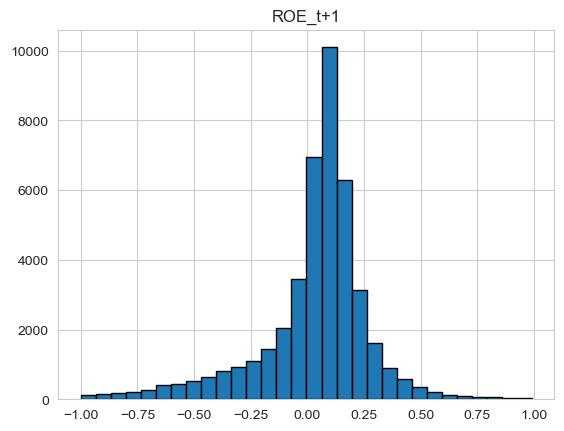

In [15]:
plt.hist(df['roe_next_year'], bins=30, edgecolor='black')
plt.title('ROE_t+1')

Text(0.5, 1.0, 'ROE_t')

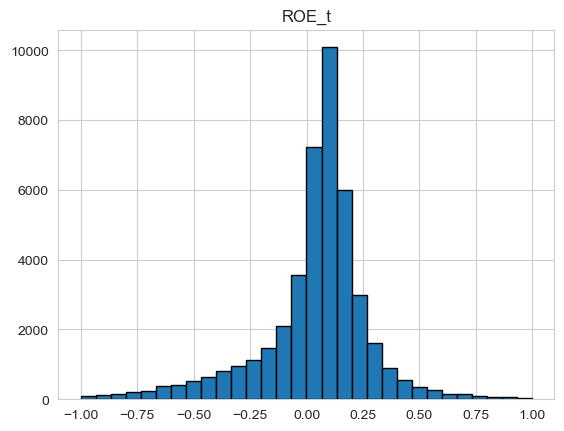

In [5]:
plt.hist(df['roe'], bins=30, edgecolor='black')
plt.title('ROE_t')

Text(0.5, 1.0, 'OPINC_t')

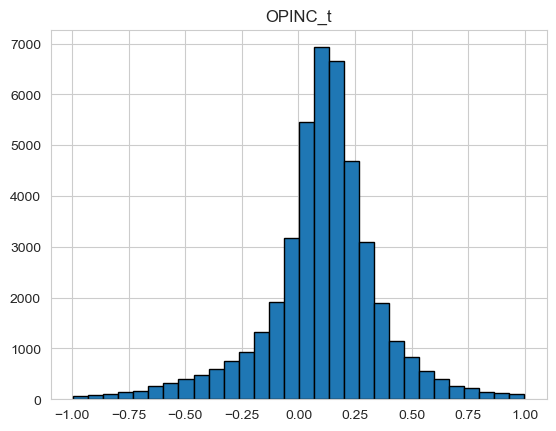

In [6]:
plt.hist(df['opinc'], bins=30, edgecolor='black')
plt.title('OPINC_t')

Text(0.5, 1.0, 'NOPINC_t')

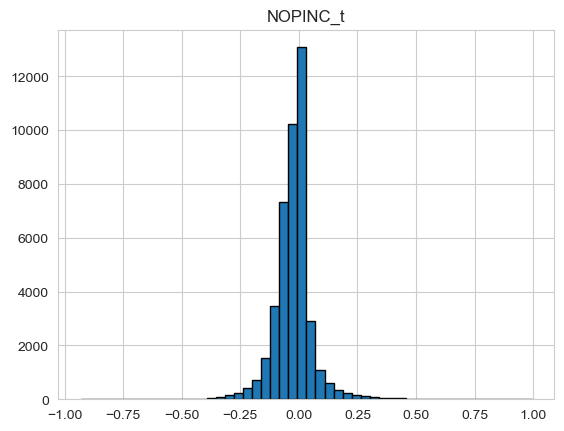

In [7]:
plt.hist(df['nopinc'], bins=50, edgecolor='black')
plt.title('NOPINC_t')

In [ ]:
df[['token_count', 'tone']].describe().transpose()

Text(0.5, 1.0, 'MD&A Length')

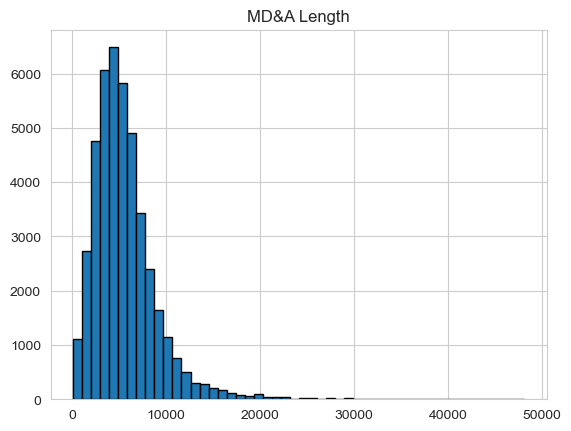

In [14]:
plt.hist(df['token_count'], bins=50, edgecolor='black')
plt.title('MD&A Length')

Text(0.5, 1.0, 'Tone_t')

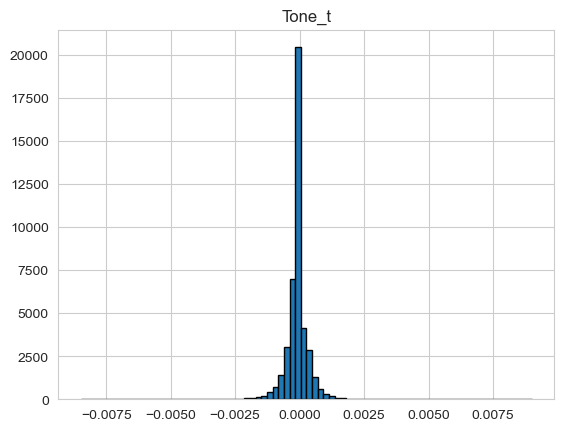

In [13]:
plt.hist(df['tone'], bins=80, edgecolor='black')
plt.title('Tone_t')

In [10]:
df_sub = df[['roe_next_year', 'roe', 'opinc', 'nopinc', 'tone']]
df_sub.rename(
    columns={
        'roe_next_year': 'ROE_t+1',
        'roe': 'ROE_t',
        'opinc': 'OPINC_t',
        'nopinc': 'NOPINC_t',
        'tone': 'Tone_t'
    },
    inplace=True
)

/var/folders/12/mzjj1_cs2g9_x2lj5mgdt4n80000gn/T/ipykernel_95931/2110721169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.rename(


,ROE_t+1,ROE_t,OPINC_t,NOPINC_t,Tone_t
0,0.127945,0.095362,0.131652,-0.015174,-0.000472
1,0.139220,0.127945,0.149182,-0.022282,0.000000
2,0.088296,0.063607,0.105913,-0.030043,0.000000
3,0.079613,0.088296,0.136418,-0.040048,-0.000328
4,0.061607,0.079613,0.138888,-0.026679,-0.000799


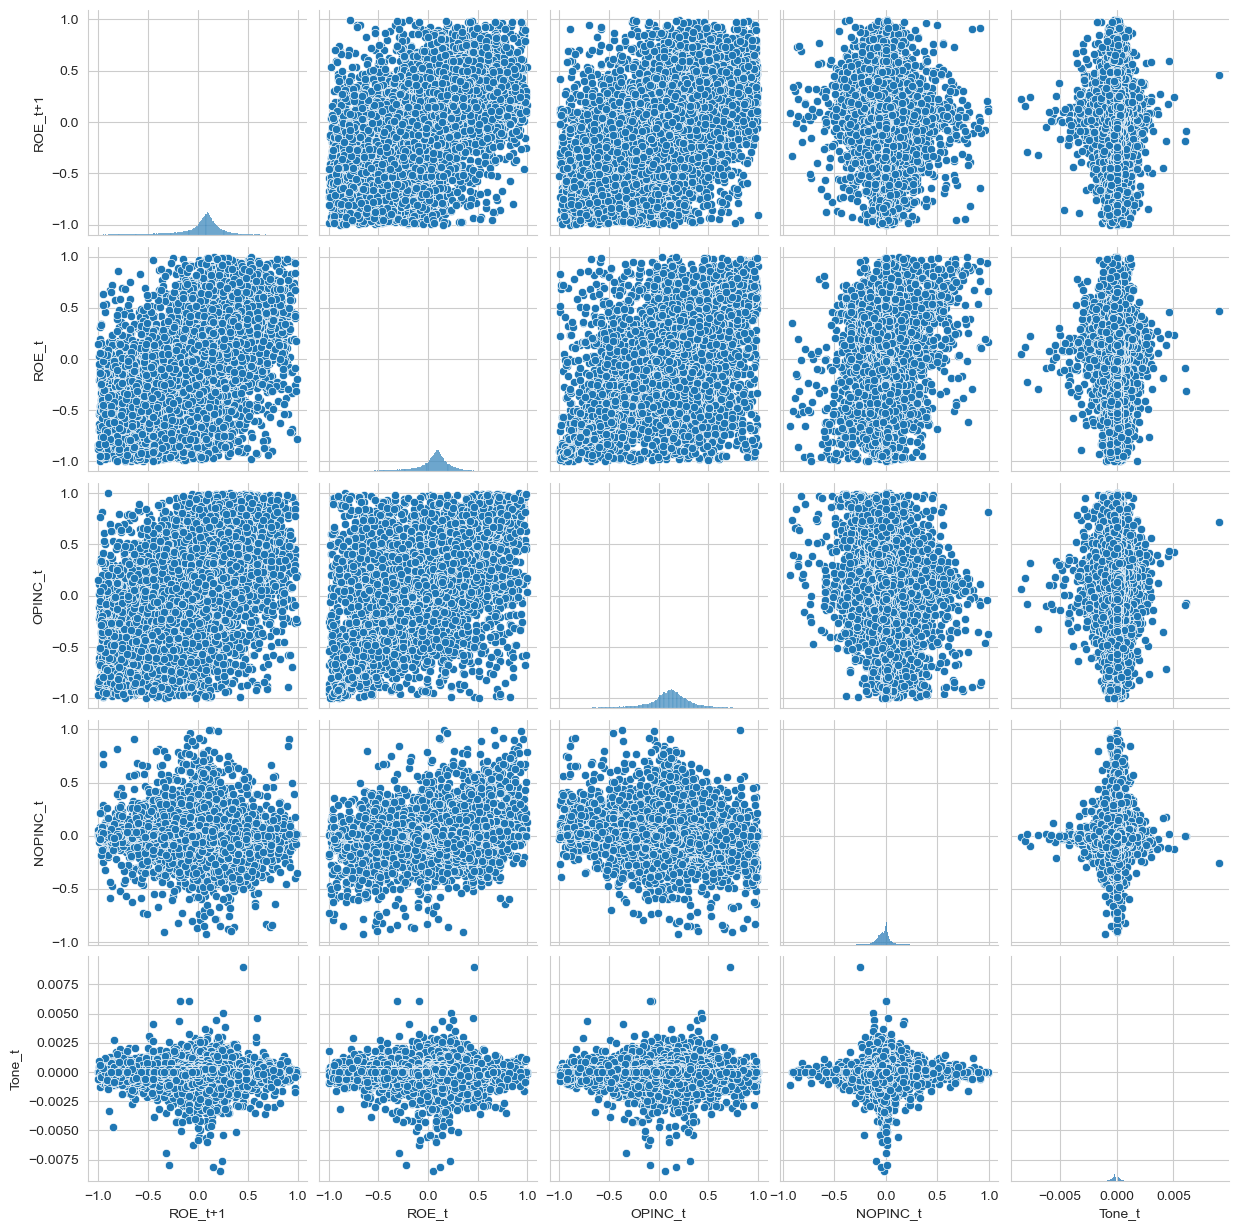

In [11]:
# scatterplot between variables
sns.pairplot(df_sub)
plt.show()

<Axes: >

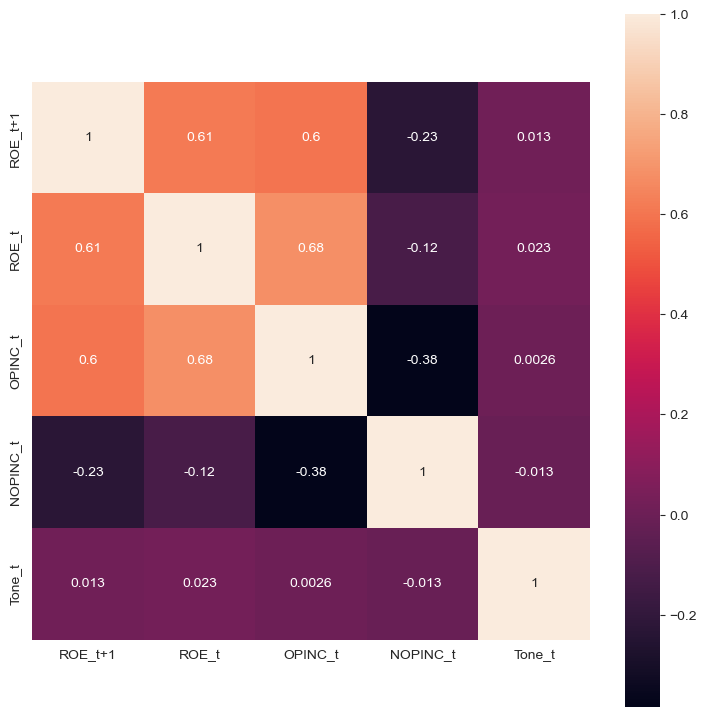

In [12]:
# correlation for Model Q and T
corr = df_sub.corr()
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr, annot=True, square=True)

In [ ]:
# MD&A cosine similarity
# randomly sample 50 MD&As for visualisation due to limited computation
# make sure sampling the same subset of files to compare text representation approaches
file_id_sampled = df['file_id'].sample(n=50, random_state=42)

bow_vector_sampled = df_bow[df_bow['file_id'].isin(file_id_sampled)]['bow_vector'].tolist()
w2v_vector_sampled = df[df['file_id'].isin(file_id_sampled)]['text_vector'].tolist()

In [ ]:
similarities_bow = cosine_similarity(bow_vector_sampled)
similarities_w2v = cosine_similarity(w2v_vector_sampled)

In [ ]:
# make sure visualise in the same scale
min_value = min(np.min(similarities_bow), np.min(similarities_w2v))
max_value = max(np.max(similarities_bow), np.max(similarities_w2v))
common_scale = (min_value, max_value)

# mask the upper triangle
mask = np.triu(np.ones_like(similarities_bow), k=1)
plt.figure(figsize=(25, 25))
sns.heatmap(
    similarities_bow,
    annot=True,
    cmap="YlGnBu",
    mask=mask,
    vmin=common_scale[0],
    vmax=common_scale[1]
)
plt.title("MD&A Cosine Similarity (Represented by Bag-of-Words)")
plt.show()

In [ ]:
mask = np.triu(np.ones_like(similarities_w2v), k=1)
plt.figure(figsize=(28, 28))
sns.heatmap(
    similarities_w2v,
    annot=True,
    cmap="YlGnBu",
    mask=mask,
    vmin=common_scale[0],
    vmax=common_scale[1]
)
plt.title("MD&A Cosine Similarity (Represented by Word2Vec)")
plt.show()